# PSMA 2020
# An Introduction to Forecasting using Python

## Managing Time Series Data in Python
*This initial section is a basic primer to help manage time series data structures in Python*

Before we can produce forecasts we need to learn how to manipulate and manage dates in Python's NumPy and Pandas libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates

import seaborn as sns  #seaborn is a nice plotting library that sits on top of matplotlib
import matplotlib.style as style
style.use('ggplot')

## A quick refresher on NumPy Arrays.

NumPy is a high performance library for scientific computing in Python.  It provides the fundermental building block of the SciPy library `numpy.ndarray`

You may be familar with Python Lists. Creation and accessing individual array elements and slicing array is very similar to a list. A big difference is that a `numpy.ndarray` requires all data values to be of the **same type**.

Suppose that we want a numpy array containing the integers 4, 3, 1, 5 and 6.
(Note: a 1D array is referred to as a vector)

A simple way to create such an array and access its data is to use the following syntax.

In [2]:
arr = np.array([4, 3, 1, 5, 6])

bar = 1.25

print(f'the array contains {bar:.1f}')
print(f'a numpy array has has type {type(arr)}')
print(f'the array has a shape of {arr.shape}')
print(f'the array has a length of {len(arr)}')

the array contains 1.2
a numpy array has has type <class 'numpy.ndarray'>
the array has a shape of (5,)
the array has a length of 5


#### NumPy arrays are zeroed indexed

In [3]:
print(f'The item at index 0 in the array is {arr[0]}')
print(f'The item at index 2 in the array is {arr[2]}')

The item at index 0 in the array is 4
The item at index 2 in the array is 1


In [4]:
np.arange(100).reshape(2, 5, 10)

array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]],

       [[50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]])

#### NumPy array slicing

`[start:end]` where start is inclusive and end is exclusive

In [5]:
print(f'The first two elements in the array are {arr[:2]}')
print(f'If we want the last two items in the array we can  {arr[3:]}')
print(f'Or we can can use negative slice notation {arr[-2:]}')

The first two elements in the array are [4 3]
If we want the last two items in the array we can  [5 6]
Or we can can use negative slice notation [5 6]


## Datetimes in NumPy

If not done correctly, dates and times can be painful to use in coding!

NumPy's data type to manage datetimes is called `datetime64`. 

### Static arrays of `datetime64`

In [6]:
np.array(['2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14'], dtype='datetime64')

array(['2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14'],
      dtype='datetime64[D]')

Notice that the np.array has dtype='datetime64[D]'.  The 'D' standard for the minimum unit of days
Consider an alternative where we include hours.  You need to include the letter 'T' (for timestamp) in string pass to the numpy.array

In [7]:
np.array(['2019-07-11T06', '2019-07-12T12', '2019-07-13T01', '2019-07-14T17'], 
         dtype='datetime64')

array(['2019-07-11T06', '2019-07-12T12', '2019-07-13T01', '2019-07-14T17'],
      dtype='datetime64[h]')

That time the dtype='datetime64[h]' where 'h' stands for hours.  We can go further and try minutes.

In [8]:
np.array(['2019-07-11T00:13', '2019-07-12T00:15', '2019-07-13T00:15', '2019-07-14T00:05'], 
         dtype='datetime64')

array(['2019-07-11T00:13', '2019-07-12T00:15', '2019-07-13T00:15',
       '2019-07-14T00:05'], dtype='datetime64[m]')

And now try seconds

In [9]:
np.array(['2019-07-11T00:13:59', '2019-07-12T00:15:30', '2019-07-13T00:15:20', '2019-07-14T00:05:15'], 
         dtype='datetime64')

array(['2019-07-11T00:13:59', '2019-07-12T00:15:30',
       '2019-07-13T00:15:20', '2019-07-14T00:05:15'],
      dtype='datetime64[s]')

and miliseconds

In [10]:
np.array(['2019-07-11T00:13:59.100', '2019-07-12T00:15:30.189'], 
         dtype='datetime64')

array(['2019-07-11T00:13:59.100', '2019-07-12T00:15:30.189'],
      dtype='datetime64[ms]')

### Quick creation of date arrays using `np.arange`

`np.arange(start,stop,step)` (where stop is *exclusive*) is commonly used to produce an np.array of integers can be used to produce an array of evenly-spaced integers (particularly good for generating synthetic testing data).  

`np.arange` can also be used to generate a range of date time stamps.

*Try changing the step argument to a different value*

In [11]:
np.arange('2019-07-01', '2019-07-31', step=1, dtype='datetime64[D]')

array(['2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04',
       '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08',
       '2019-07-09', '2019-07-10', '2019-07-11', '2019-07-12',
       '2019-07-13', '2019-07-14', '2019-07-15', '2019-07-16',
       '2019-07-17', '2019-07-18', '2019-07-19', '2019-07-20',
       '2019-07-21', '2019-07-22', '2019-07-23', '2019-07-24',
       '2019-07-25', '2019-07-26', '2019-07-27', '2019-07-28',
       '2019-07-29', '2019-07-30'], dtype='datetime64[D]')

In [12]:
foo = np.arange('2019-07-01', '2019-07-31', step=7, dtype='datetime64[m]')
foo.shape

(6172,)

To get all values in between two dates then *omit* the step argument.  The below generates days between 1st and 10th August

In [13]:
np.arange('2019-07-01', '2019-07-10', dtype='datetime64[D]')

array(['2019-07-01', '2019-07-02', '2019-07-03', '2019-07-04',
       '2019-07-05', '2019-07-06', '2019-07-07', '2019-07-08',
       '2019-07-09'], dtype='datetime64[D]')

## Date Time Index in Python

pandas `datetimeindex` builds on numpy datetime64 data type.  Pandas is definitely the easiest way to work with time series data in Python.  One of the reasons for this is that pandas can detect and handle different formats of date strings in input files.  Always watch out for problems with US -> UK dates and vice versa.

### Static creation

If you need to create some synthetic data for testing then you can use the `pandas.date_range` function.

In [14]:
index = pd.date_range('3/1/2019', periods=7, freq='D')
index

DatetimeIndex(['2019-03-01', '2019-03-02', '2019-03-03', '2019-03-04',
               '2019-03-05', '2019-03-06', '2019-03-07'],
              dtype='datetime64[ns]', freq='D')

* A hourly date range

In [15]:
index = pd.date_range('1/1/2019', periods=7, freq='h')
index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

* A 'monthly start' range.

In [16]:
index = pd.date_range('1/1/2019', periods=7, freq='MS')
index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01'],
              dtype='datetime64[ns]', freq='MS')

**Convert numpy array to datetime index**

For data manipulation and analysis I often find myself moving between NumPy arrays and pandas DataFrames. 

In [17]:
arr_dates = np.array(['2019-07-11', '2019-07-12', '2019-07-13'], dtype='datetime64')
index = pd.DatetimeIndex(arr_dates)
index

DatetimeIndex(['2019-07-11', '2019-07-12', '2019-07-13'], dtype='datetime64[ns]', freq=None)

Note that in the example above the frequency is **None**.  That's annoying and there are some forecasting tools in Python that will insist on having a frequency.  There are two ways to sort this out.

In [18]:
#pass in the frequency argument
arr_dates = np.array(['2019-07-11', '2019-07-12', '2019-07-13'], dtype='datetime64')
index = pd.DatetimeIndex(arr_dates, freq='D')
index

DatetimeIndex(['2019-07-11', '2019-07-12', '2019-07-13'], dtype='datetime64[ns]', freq='D')

In [19]:
#set the frequency post-hoc
arr_dates = np.array(['2019-07-11', '2019-07-12', '2019-07-13'], dtype='datetime64')
index = pd.DatetimeIndex(arr_dates)
index.freq = 'D'
index

DatetimeIndex(['2019-07-11', '2019-07-12', '2019-07-13'], dtype='datetime64[ns]', freq='D')

**Finding the min|max andin a date time index and accessing a TimeStamp**

In [20]:
index.min()

Timestamp('2019-07-11 00:00:00')

In [21]:
index.max()

Timestamp('2019-07-13 00:00:00')

In [22]:
print(index.min().year)
print(index.min().month)
print(index.min().days_in_month)

2019
7
31


## Importing data from a CSV file

First create a synthetic data set and save to csv

In [23]:
LAMBDA = 30
PERIODS = 365 * 2

idx = pd.date_range('1/1/2018', periods=PERIODS, freq='D')

# representing a count variable of sales og widgets with mean LAMBDA.
sales = np.random.poisson(LAMBDA, size=PERIODS) 
df = pd.DataFrame(sales, index=idx)
df.columns = ['sales']
df.index.name = 'date'
df.head()


,sales
date,
2018-01-01,37
2018-01-02,25
2018-01-03,22
2018-01-04,30
2018-01-05,28


In [24]:
df.to_csv('data/example_data1.csv') # save to file

Now read in the data and let pandas know that the index is a date field using the `parse_dates` argument.

In [25]:
df = pd.read_csv('data/example_data1.csv', index_col='date', parse_dates=True)
#you have to set this manually

df.index.freq='D'

In [26]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', name='date', length=730, freq='D')

In [27]:
df.head()

,sales
date,
2018-01-01,37
2018-01-02,25
2018-01-03,22
2018-01-04,30
2018-01-05,28


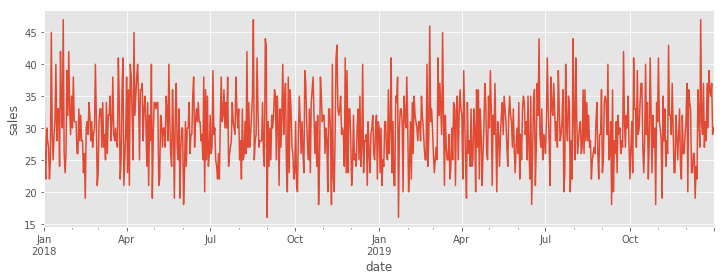

In [28]:
ax = df['sales'].plot(figsize=(12,4))
ax.set(xlabel='date', ylabel='sales');


**Limit to specific time ranges**

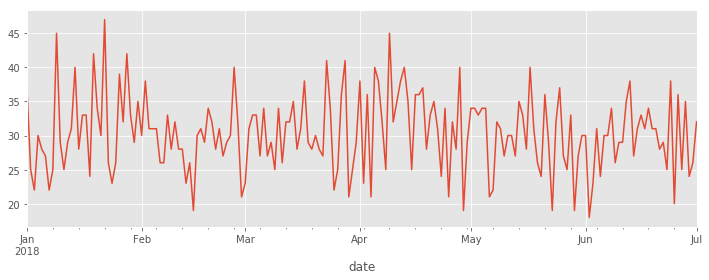

In [29]:
#e.g. first 6 months of 2018 - just use slicing
df['sales']['2018-01-01':'2018-07-01'].plot(figsize=(12,4));

### Easy ways to get access to specific types of dates

A simple way to do this is using the resample function.

In [30]:
df.resample(rule='A').mean() # year end frequency (Should be 30ish!)

,sales
date,
2018-12-31,30.016438
2019-12-31,29.731507


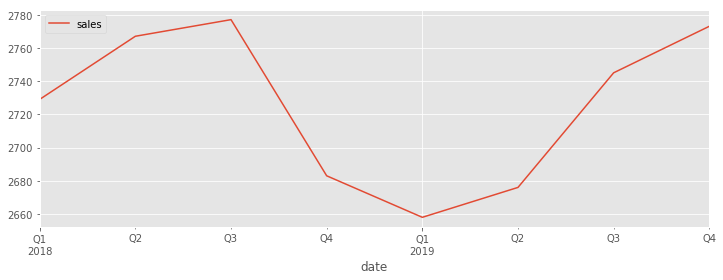

In [31]:
df.resample(rule='Q').sum().plot.line(figsize=(12,4)) # month end maximum sales

## Time Series Forecasting

We are going to work with a famous time series dataset: monthly airline passengers between 1949 and 1960.  Its a cool data set that is useful for learning how to use forecasting tools.  

Our workflow will be:

* Load the dataset and setup a datetimeindex
* Split the dataset into train and test series
* Preprocess the data
* Perform a seasonal decomposition
* Build a simple baseline forecast
* Build a seasonal ARIMA model
* Measure the point forecast accuracy of the baseline and ARIMA model
* Fit prediction intervals to the model.
* Conduct time series cross validation and select the best model
* Simulate the forecast
* Produce the actual forecast.

### Loading the dataset

The data set is conveniently part of a library called `pmdarima` which bundles a group classes for 
ARIMA modelling and some test datasets.*

In [32]:
#!pip install pmdarima
import pmdarima as pmd
pmd.__version__  #should be version 1.5.2

'1.5.2'

In [33]:
from pmdarima.datasets import load_airpassengers, load_lynx

In [34]:
START_DATE = '1949-01-01'
airline = load_airpassengers(as_series=True)

#there's no datetimeindex from the bundled dataset. So let's add one.
airline.index= pd.date_range(START_DATE, periods=len(airline), freq='MS')
airline.head()

1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
Freq: MS, dtype: float64

In [35]:
airline.shape

(144,)

In [36]:
len(airline)

144

In [37]:
airline.index.max()

Timestamp('1960-12-01 00:00:00')

## Train, Test Split.  A.K.A. DON'T PLOT IT YET 

We need to hold back some of our data.  This is so we can simulate forecasting conditions and check a models accuracy on unseen data.  We don't want to know what it looks like as that will introduce bias into the forecasting process and mean we overfit our model to the data we hold.

**Remember - there is no such thing as real time data from the future!**

In [38]:
def ts_train_test_split(data, split_date):
    '''
    Split time series into training and test data
    
    Parameters:
    -------
    data - pd.DataFrame - time series data.  Index expected as datatimeindex
    split_date - the date on which to split the time series
    
    Returns:
    --------
    tuple (len=2) 
    0. pandas.DataFrame - training dataset
    1. pandas.DataFrame - test dataset
    '''
    train = data.loc[data.index < split_date]
    test = data.loc[data.index >= split_date]
    return train, test

In [39]:
#hold back the last twelve months
train, test = ts_train_test_split(airline, '1960-01-01')

In [40]:
len(train)

132

In [41]:
#quick check that we have held back 12 months
len(test)

12

## Plotting the training data

Now that we have held back a 'test' set we can safely plot at the airline passengers without introducing bias. 

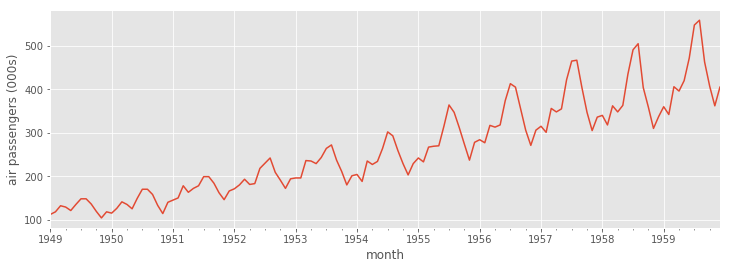

In [42]:
ax = train.plot(figsize=(12,4))
ax.set(xlabel='month', ylabel='air passengers (000s)');

Removing variation due to months having a different number of days

In [43]:
train_adj = train / train.index.days_in_month
test_adj = train / train.index.days_in_month

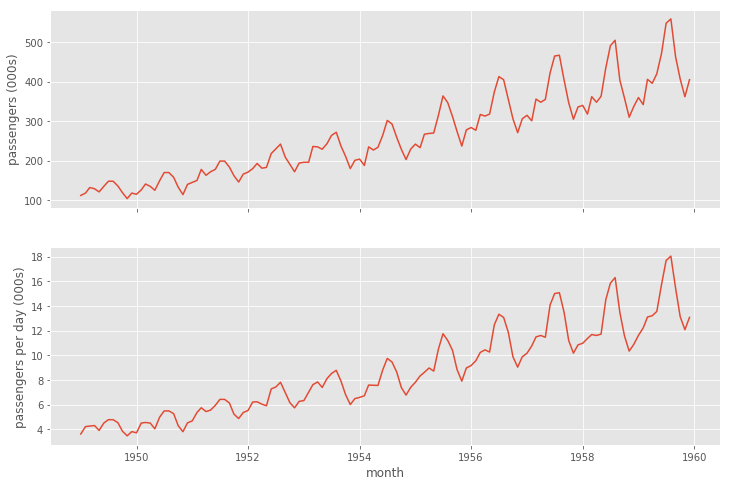

In [44]:
#plot the adjusted and unadjusted series
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

axes[0].figsize = (12, 10)

axes[0].plot(train)
axes[0].set(ylabel='passengers (000s)');

axes[1].plot(train_adj)
axes[1].set(xlabel='month', ylabel='passengers per day (000s)');


## Seasonal decomposition

Before performing a forecast it is worth decomposing the time series into its components of trend, seasonality and noise.

* statsmodels has function called `seasonal_decompose()` for this task

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [46]:
sd_result = seasonal_decompose(train_adj, model='multiplicative')

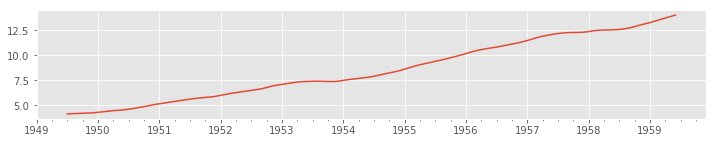

In [47]:
ax = sd_result.trend.plot(figsize=(12,2))

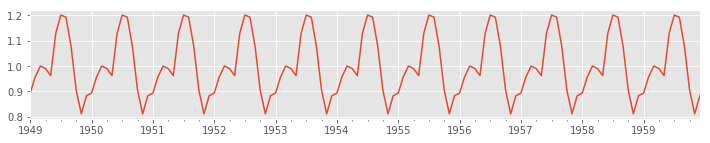

In [48]:
ax = sd_result.seasonal.plot(figsize=(12,2))

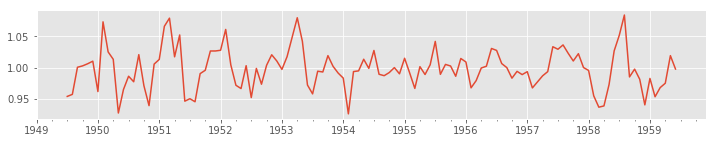

In [49]:
ax = sd_result.resid.plot(figsize=(12,2))

### A simple forecasting baseline.

Before employing any complex forecasting approach we are going to use a simple model to create a baseline.  Complex models need to be 'more accurate' than the simple baseline otherwise we throw them out!  We will define how we measure accuracy shortly.

Given the strong seasonal component that was confirmed by the seasonal decomposition we are going to use a **seasonal naive** forecasting method.  This is part of the 'carry forward previous values' family of *naive* forecasting methods.  In general, if we have data with period $k$ are at time $t$ and we are predicting time $Y_{t+1}$ then we simply carry forward the value from $Y_{t+1-k}$

For example:

In [50]:
from forecast.baseline import Naive1, SNaive

In [51]:
HORIZON = 12
PERIOD = 12

In [52]:
snf = SNaive(period=PERIOD)
snf.fit(train_adj)
insample_predictions = snf.fittedvalues

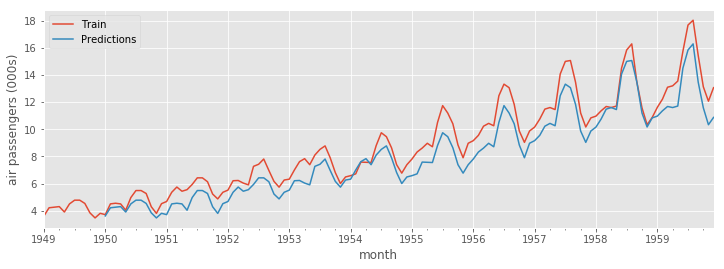

In [53]:
ax = train_adj.plot(figsize=(12,4))
insample_predictions.plot(ax=ax)
ax.set(xlabel='month', ylabel='air passengers (000s)');
ax.legend(['Train', 'Predictions'])

### In-Sample Diagnostics

To have a look at the in-sample diagnostics take alook at the model **residuals** (difference between the actual value and the prediction)

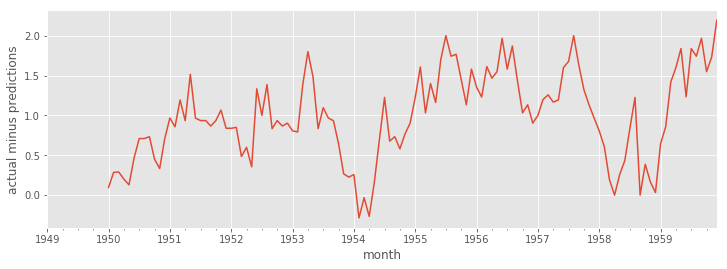

In [54]:
ax = snf.resid.plot(figsize=(12,4))
ax.set(xlabel='month', ylabel='actual minus predictions');

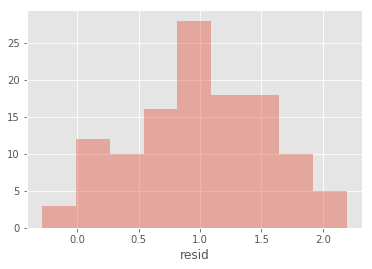

In [55]:
sns.distplot(snf.resid.dropna(), kde=False)

### Measuring the size of the in-sample model error

There are many ways to quantify the size of the residuals. Each has its own pro's and con's. One problem is that forecast errors can be both positive and negative and that can mask the true size of the deviations. A simple way to remedy this is to use Mean Absolute Deviation or Mean Squared Error.  There's a bit of debate about if you should take the median value or the mean, but here we will just use the mean.

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [57]:
#remember that SNAIVE doesn't fit anything to the first PERIOD data points
mean_squared_error(y_true=train_adj[PERIOD:], y_pred=insample_predictions[PERIOD:])

1.2808087721828623

In [58]:
mean_absolute_error(y_true=train_adj[PERIOD:], y_pred=insample_predictions[PERIOD:])

0.9999679979518687

Mean absolute error is conceptually easier to understand.  The dimensions of MSE are airpassengers squared!  Which is odd!  One way to remedy this units issue is the **Root Mean Squared Error (RMSE)**

RMSE = $\sqrt{mean(e_t^2)}$ where $e_t$ is the error in predicting $y_t$.

In [59]:
from statsmodels.tools.eval_measures import rmse

In [60]:
rmse(x1=train_adj[PERIOD:], x2=insample_predictions[PERIOD:])

1.1317282236397845

In [61]:
#another way!
np.sqrt(mean_squared_error(y_true=train_adj[PERIOD:], y_pred=insample_predictions[PERIOD:]))

1.1317282236397845

RMSE and MAE are called 'scale dependent' measures as the units and magnitude are specific to the problem and context.  An alternative approach is to use a scale invariant measure such as the **mean absolute percentage error (MAPE)**

The percentage error is given by $p_t = 100e_t/y_t$ where $e_t$ is the error in predicting $y_t$.  Therefore, MAPE = $mean(|p_t|)$. A limitation of MAPE is that it is inflated when the denominator is small relative to the absolute forecast error (such in the case of outliers or extreme unexpected events). It is also penalises negative errors more than positive errors.  A consequence of this property is that MAPE can lead to selecting a model that tends to under forecast.  The two following examples illustrate the issue. $$APE_{1} = \left| \frac{y_t - \hat{y_t}}{y_t} \right|= \left| \frac{150 - 100}{150} \right| = \frac{50}{150} = 33.33\%$$  

$$APE_{2} = \left| \frac{100 - 150}{100} \right| = \frac{50}{100} = 50\%$$

In [62]:
def mean_absolute_percentage_error(y_true, y_pred): 
    '''
    MAPE

    Parameters:
    --------
    y_true -- np.array actual observations from time series
    y_pred -- the predictions to evaluate

    Returns:
    -------
    float, scalar value representing the MAPE (0-100)
    '''
    #y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [63]:
mean_absolute_percentage_error(y_true=train_adj[PERIOD:], y_pred=insample_predictions[PERIOD:])

11.377828929635351

## A second baseline.  Naive Forecast 1

This method is even simpler than Seasonal Naive. It simply carries forward the previous value. 

**Task**: 

* Have a go at using the `Naive1()` class.  It follows the same pattern as SNaive interface.  Instantiate a class.  call the `.fit(y_train)` method and then use the `.fittedvalues` and `.resid` properties for diagnostics.  
* Calculate the in-sample RMSE and MAPE
* What happens to the insample residuals if you fit the raw training data to the model?

**Step 1**: Create a instanace of `Naive1()`,  fit `train_adj` and store the `.fittedvalues` in a variable called `nf1_fitted_values`

In [64]:
#your code here
#nf1 = 

In [65]:
nf1 = Naive1()
nf1.fit(train_adj)
nf1_fitted_values = nf1.fittedvalues

**Step 2**: Plot the training time series and fitted_values

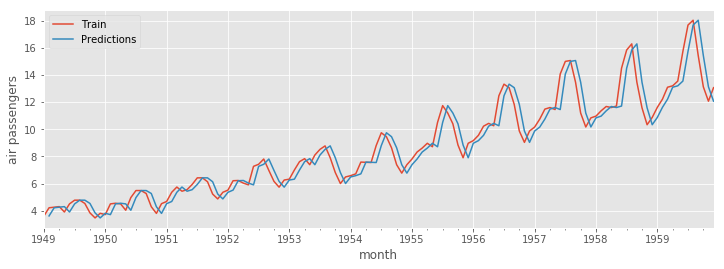

In [66]:
ax = train_adj.plot(figsize=(12,4))
nf1_fitted_values.plot(ax=ax)
ax.set(xlabel='month', ylabel='air passengers');
ax.legend(['Train', 'Predictions'])

**Step 3**: Plot the residuals.

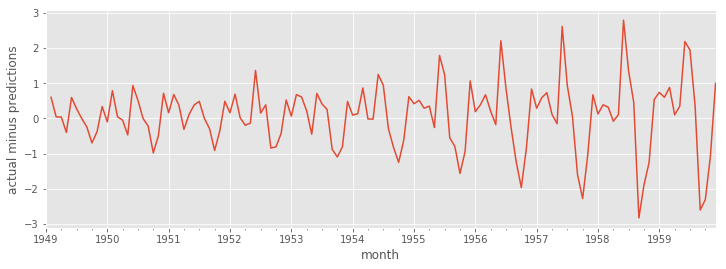

In [67]:
ax = nf1.resid.plot(figsize=(12,4))
ax.set(xlabel='month', ylabel='actual minus predictions');

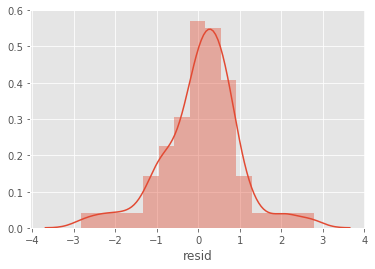

In [68]:
sns.distplot(nf1.resid.dropna());

**Step 4**: Calculate insample rmse and mape scores

In [69]:
rmse(x1=train_adj[1:], x2=nf1_fitted_values[1:])

0.9303732419121814

In [70]:
mean_absolute_percentage_error(y_true=train_adj[1:], y_pred=nf1_fitted_values[1:])

7.878380383743695

## Which baseline should we use?

We saw the NF1 had a lower **in sample** MAPE and RMSE.  This is effectively the 1-step forecast performance of these methods. To be rigourous in choosing the the best baseline forecast we should really look at **out-of-sample** accuracy for multi-step forecasts. For example, the accuracy when forecasting 6 or 12 months ahead. 

**IMPORTANT** You could use your **test** dataset to choose your best model (and many examples you will see on the web will do that), but ideally you keep that safely locked away and unexplored until you have selected and tuned a model.  Your test data gives you a *single* chance to simulate forecasting the future - so use it wisely!

A good strategy is therefore to further divide *train* to create a **validation** set that can be used to tune and select models.

In [71]:
train_adj, val_adj = ts_train_test_split(train_adj, '1959-01-01')

In [72]:
train_adj.shape

(120,)

In [73]:
val_adj.shape

(12,)

In [74]:
#create our models and fit our data.
PERIOD = 12

nf1 = Naive1()
snf = SNaive(period=PERIOD)

nf1.fit(train_adj)
snf.fit(train_adj)

In [75]:
#predict 12-steps ahead
HORIZON = 12
nf1_preds = nf1.predict(horizon=HORIZON)
snf_preds = snf.predict(horizon=HORIZON)

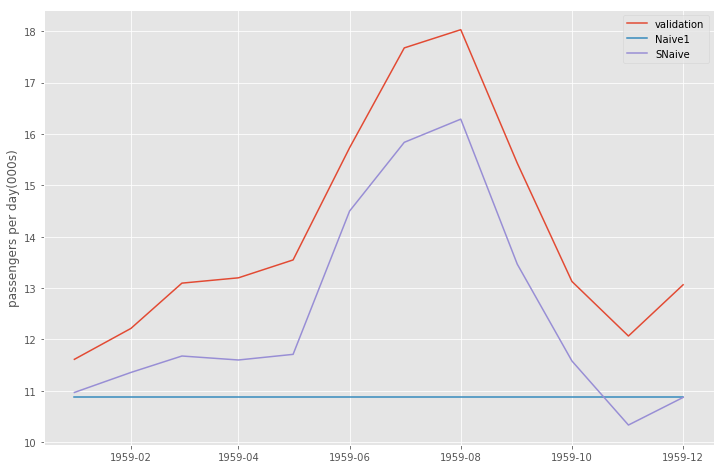

In [76]:
#plot the model predictions
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(12, 8))

axes.figsize = (12, 10)

axes.plot(val_adj)
axes.plot(pd.Series(nf1_preds, index=val_adj.index));
axes.plot(pd.Series(snf_preds, index=val_adj.index));
axes.set(ylabel='passengers per day(000s)');
axes.legend(['validation', 'Naive1', 'SNaive']);

Naive1 Point Forecast Error

In [77]:
#MAPE
mean_absolute_percentage_error(y_true=val_adj, y_pred=nf1_preds)

21.197523197748666

In [78]:
#RMSE
rmse(x1=val_adj, x2=nf1_preds)

3.8003508482669264

SNaive Point Forecast Error

In [79]:
#MAPE
mean_absolute_percentage_error(y_true=val_adj, y_pred=snf_preds)

11.05792378890113

In [80]:
#RMSE
rmse(x1=val_adj, x2=snf_preds)

1.6104872806393944

* **Conclusion**  Its a slightly different picture out of sample!  SNaive is the best simple baseline model.

### Prediction Intervals

Prediction intervals are useful because they give an upper and lower bound on point forecast.  You can choose coverage level e.g. 90% or 80%.  In practice prediction intervals are often to narrow or far to wide.  

In [81]:
intervals = snf.prediction_interval(horizon=HORIZON, levels=[0.8, 0.9])

In [82]:
#intervals is an list
type(intervals)

list

In [83]:
#there are 2 items in this list as we have returned the 80% and 90% prediction intervals
len(intervals)

2

In [84]:
#each item in the list is a numpy array
type(intervals[0])

numpy.ndarray

In [85]:
#each numpy array has h rows covering the forecasting horizon and 2 columns for the lower
#and upper bound
intervals[0].shape

(12, 2)

In [86]:
intervals[1]

array([[10.15349222, 11.78199165],
       [10.54289314, 12.17139257],
       [10.86316964, 12.49166907],
       [10.78575029, 12.41424971],
       [10.89542771, 12.52392713],
       [13.68575029, 15.31424971],
       [15.02445997, 16.65295939],
       [15.47607287, 17.10457229],
       [12.65241695, 14.28091638],
       [10.76639545, 12.39489487],
       [ 9.51908362, 11.14758305],
       [10.05671803, 11.68521745]])

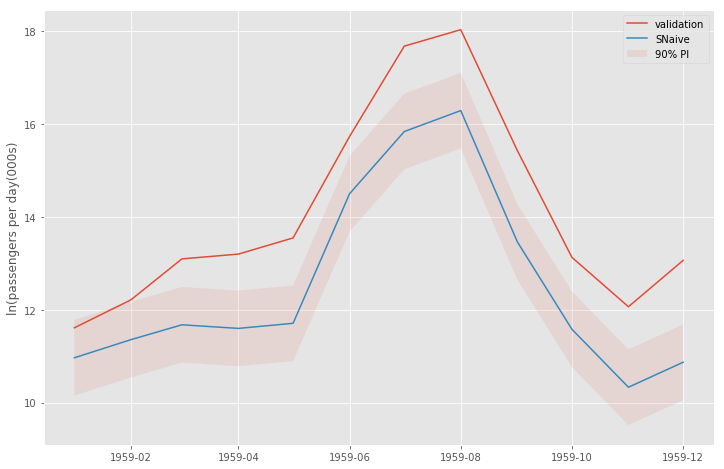

In [87]:
#plot the model with 90% predictions intervals
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(12, 8))

axes.figsize = (12, 10)

axes.plot(val_adj)
axes.plot(pd.Series(snf_preds, index=val_adj.index));
axes.set(ylabel='ln(passengers per day(000s)');

limits = pd.DataFrame(intervals[1], index=val_adj.index, columns=['lower', 'upper'])
axes.fill_between(val_adj.index, limits['lower'], limits['upper'], 
                  alpha=.1, 
                  label='90% PI')

axes.legend(['validation', 'SNaive', '90% PI']);

In [88]:
#what prediction interval coverage have we actually achieved?
#will look at the 90% prediction intervals

for h in range(2, HORIZON+1, 2):
    h_validation = val_adj.iloc[:h].to_numpy()
    h_upper = limits['upper'][:h]
    h_lower = limits['lower'][:h]
    covered = ((h_validation > h_lower) & (h_validation < h_upper)).sum()
    coverage = covered / h
    print(f'h_{h}: {coverage}')

h_2: 0.5
h_4: 0.25
h_6: 0.16666666666666666
h_8: 0.125
h_10: 0.1
h_12: 0.08333333333333333


* PI Conclusion.  Poor. Hopefully we can improve on this with a more complex model!

### Back transforming the forecast

To reverse our pre-processing we need to:

* Multiply by the number of days in the month

We will demonstrate that with the validation set here, but the process is the same when producing the forecasts.

In [89]:
snf_preds = pd.Series(snf_preds, index=val_adj.index)
snf_preds_total = snf_preds * snf_preds.index.days_in_month

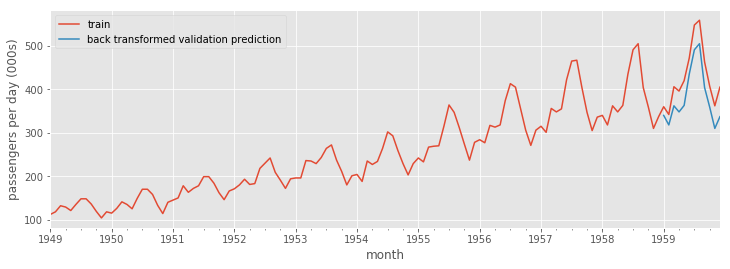

In [90]:
#plot the back transformed series
ax = train.plot(figsize=(12,4))
snf_preds_total.plot(ax=ax)
ax.set(xlabel='month', ylabel='passengers per day (000s)');
ax.legend(['train', 'back transformed validation prediction']);

In [91]:
#what does MAPE look like?
mean_absolute_percentage_error(y_true=train[-HORIZON:], y_pred=snf_preds_total)

11.057923788901132

## Can we beat the baseline with a more complex model?

### Introduction to **A**uto**R**egressive **I**ntegrated **M**oving **A**verage (ARIMA) Modelling

Before we use ARIMA it is necessary to understand the a two concepts: **autocorrelation** and **stationarity**

#### Autocorrelation 

Autocorrelation (sometimes called serial correlation) describes the correlation of air passengers at time $t$ with air passengers at $t-1, t-2, ... , t-n$. In other words autocorrelation is the correlation of an observation with itself at previous time periods.  Like correlation autocorrelation takes a value between -1.0 ans 1.0

Let's have a look at the autocorrelation in the training data.


In [92]:
from statsmodels.graphics.tsaplots import plot_acf

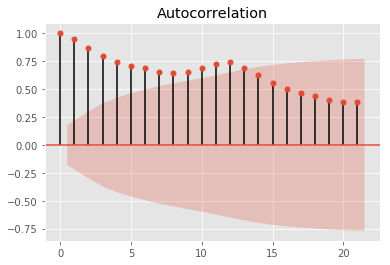

In [93]:
plot_acf(train_adj);

Autocorrelation is a problem for traditional Ordinary Least Squares (OLS) regression because OLS assumes that the error process is normal i.i.d (independent and identitically distributed = there is no pattern).  In the air passengers dataset this clearly isn't the case: there is significant autocorrelation up to lag 12.

In the presence of autocorrelation, the standard errors of the coefficients from an OLS regression are too small and cannot be trusted. This is a substative problem for *inference* (i.e making drawing the wrong conclusion, but and it is also a significant disadvantage for forecasting as we are ignoring information that could improve point predictions and prediction intervals.  

ARIMA models aim to describe the autocorrelations in the data. 

**AR** - Stands for Autoregressive. An AR(1) model is a regression model that includes a proportion of lag 1 Y value.  An AR(2) model includes a proportion of lag 1 and lag 2.  An AR(p) model includes a proportion of lags 1 to $p$.  An AR model of order p can be written as:

$y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} ⋯ \phi_p y_{t-p} + \epsilon_t$
* where $\epsilon_t$ is white noise (random error)
* The equation above looks like a regression with lagged variables of y


**MA** - Stands for Moving Average. An MA(1) model is a regression model that includes a proportion of the lag 1 forecast error value.  An MA(q) model includes a proportion of the errors from lag 1 to q.  An MA model of order q can be written as:

$y_t = c + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} ⋯ \theta_q \epsilon_{t-q}$


ARIMA models can include a both AR and MA terms at the same time.

$y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} ⋯ \phi_p y_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} ⋯ \theta_q \epsilon_{t-q}$

#### Seasonal lags
ARIMA models can also include seasonal AR and MA terms (along with a seasonal period e.g 12 for monthly data). For example, an AR(P) model where P = 1 would include lag 12.  If P = 2 then it would include lag 12 and lag 24.

#### Stationarity

A stationary time series is one whose properties do not depend on the time at which the series is observed.  They have not predictable patterns in the long run.  

* Series with trends (i.e. increasing or decreasing over time) are **not** stationary
* Series with seasonality (i.e. regular and predictable repeating patterns) are **not** stationary.
* A stationary is one with a constant variance as well as mean.

ARIMA models require data to be stationary.  The **I** in ARIMA stands for Integrated Root.  An model of I(1) has taken the first or seasonal difference of the data.  A model with I(d) has taken the dth difference

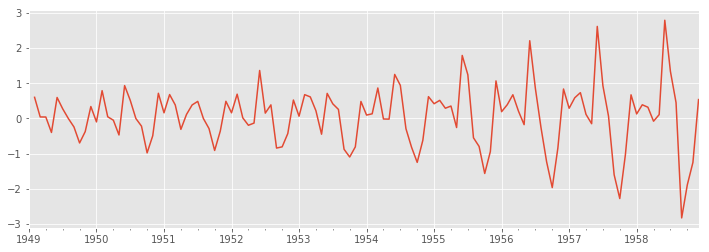

In [94]:
train_adj.diff(periods=1).plot(figsize=(12,4));

* Its clear that the data require additional transformation to stabilise the variance if we are going to use them in an ARIMA model.

A simple way to do this is the take the natural logorithm of the data.

In [95]:
train_adj = np.log(train_adj)

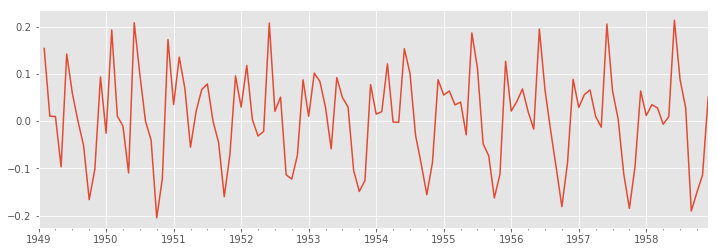

In [96]:
train_adj.diff(periods=1).plot(figsize=(12,4))

### ARIMA in Python is easy!

The `pmdarima` package is an excellent forecasting library for building ARIMA models.  I recommend it over and above the options available in core `statsmodels` package.  It is easier to use and offers an `auto_arima()` function that iteratively searches for a model that minimises the **Akaike Information Criterion (AIC)**

* ${\displaystyle \mathrm {AIC} \,=\,2k-2\ln({\hat {L}})}$

where $k$ = number of parameters in the model and $\hat{L}$ is the maximum value of the likelihood function for the model.  A likelihood function measures the 'goodness' of fit of a model to data given a set of parameters.  

This looks very complicated at first, but all we need to remember that the models we are working with are very flexible. This means that we can easily create complex models that overfit.  Recall that overfitting is when a model will predict the training data exceptionally well, but will perform poorly on out of sample data.  The form of AIC means that it rewards models that fit the training data well, but also penalises models with high $k$ (complicated models with lots of parameters).  That means that AIC will prefer simpler models - in turn reducing overfitting.  That's a great formaula for automatically selecting a good ARIMA forecasting model.

There's a large amount of theory about how to build an ARIMA model.  But modern applications tend to opt for the auto approach.

In [97]:
from pmdarima.arima import auto_arima

In [98]:
#select a model that minimises AIC
arima_model = auto_arima(train_adj, seasonal=True, m=12, suppress_warnings=True)

In [99]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(2, 0, 0)x(0, 1, 1, 12)   Log Likelihood                 204.597
Date:                            Tue, 18 Feb 2020   AIC                           -399.194
Time:                                    15:38:27   BIC                           -385.783
Sample:                                         0   HQIC                          -393.756
                                            - 120                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0170      0.010      1.755      0.079      -0.002       0.036
ar.L1          0.6195      0.089      6.960      0.000       0.445       0.794
ar.L2          0.2386      0.092      2.581      0.010       0.057       0.420
ma.S.L12      -0.5315      0.122     -4.367      0.000      -0.770      -0.293
sigma2         0.0013      0.000      7.159      0.000       0.001       0.002
===================================================================================
Ljung-Box (Q):                       42.18   Jarque-Bera (JB):                 3.55
Prob(Q):                              0.38   Prob(JB):                         0.17
Heteroskedasticity (H):               0.39   Skew:                             0.22
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

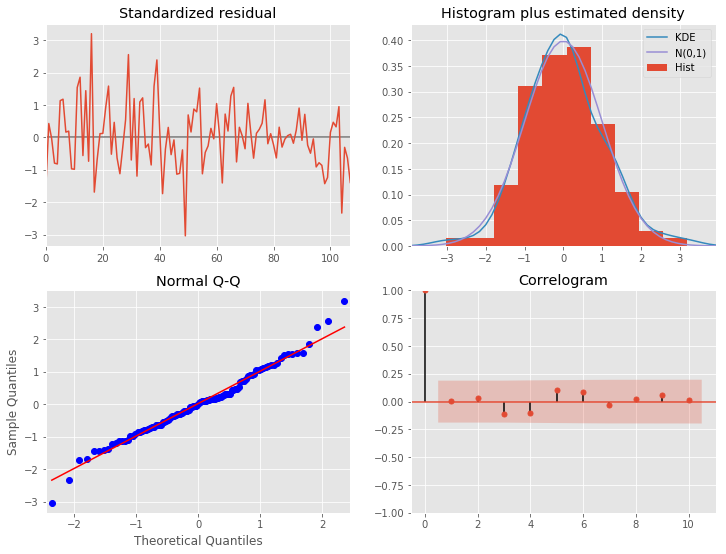

In [100]:
arima_model.plot_diagnostics(figsize=(12,9));

* **Diagnostics conclusion**.  Model assumptions look reasonable.

### Using the ARIMA model to predict the validation set.

In [101]:
HORIZON=12
arima_preds = arima_model.predict(n_periods=HORIZON)

In [102]:
#predict returns a numpy.array
type(arima_preds)

numpy.ndarray

In [103]:
arima_preds = np.exp(arima_preds)

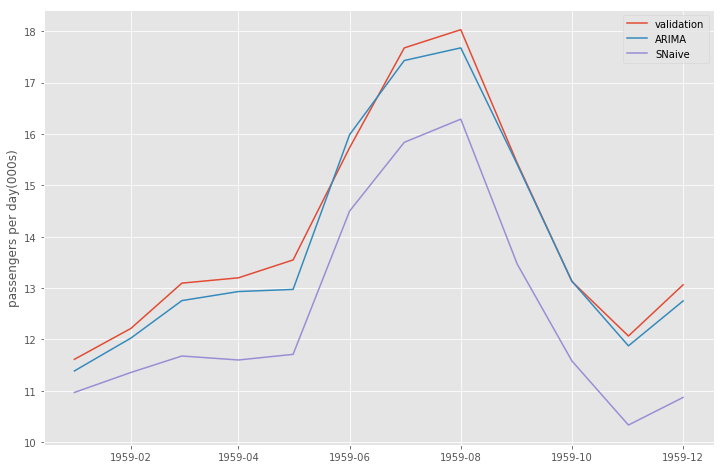

In [104]:
#plot the model predictions
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(12, 8))

axes.figsize = (12, 10)

axes.plot(val_adj)
axes.plot(pd.Series(arima_preds, index=val_adj.index));
axes.plot(pd.Series(snf_preds, index=val_adj.index));
axes.set(ylabel='passengers per day(000s)');
axes.legend(['validation', 'ARIMA', 'SNaive']);

* Preliminary conclusion.  It looks like the ARIMA model is slightly out performing SNaive

## Point Forecast Error of the ARIMA model

In [105]:
#RMSE
rmse(x1=val_adj, x2=arima_preds)

0.28715585040863084

In [106]:
#MAPE
mean_absolute_percentage_error(y_true=val_adj, y_pred=arima_preds)

1.7914043006927547

In [107]:
#remembering the SNaive MAPE

In [108]:
mean_absolute_percentage_error(y_true=val_adj, y_pred=snf_preds)

11.05792378890113

* **Point prediction conclusion**.  Out of sample accuracy is higher in the ARIMA model.

### Prediction Intervals

In [109]:
#call the predict function with the return_conf_int parameter.
#lets go for 90% PIs
arima_preds = arima_model.predict(n_periods=HORIZON, return_conf_int=True, alpha=0.1)

In [110]:
#now that we have asked for a prediction interval we return a tuple
type(arima_preds)

tuple

In [111]:
#back transform
arima_int = np.exp(arima_preds[1])
arima_preds = np.exp(arima_preds[0])

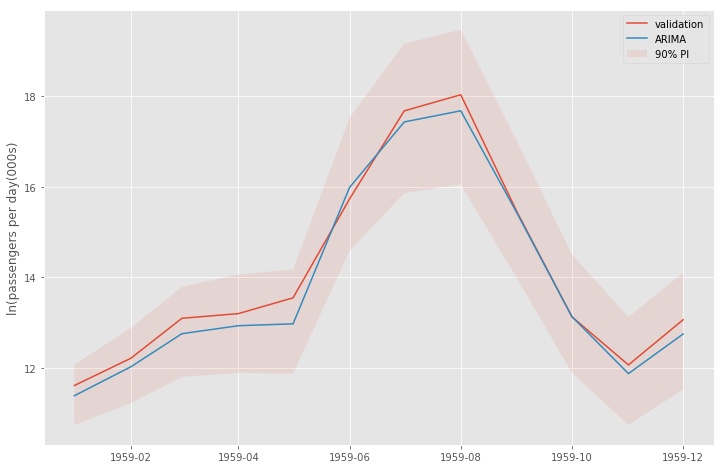

In [112]:
#plot the model with 90% predictions intervals
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(12, 8))

axes.figsize = (12, 10)

axes.plot(val_adj)
axes.plot(pd.Series(arima_preds, index=val_adj.index));
axes.set(ylabel='ln(passengers per day(000s)');

limits = pd.DataFrame(arima_int, index=val_adj.index, columns=['lower', 'upper'])
axes.fill_between(val_adj.index, limits['lower'], limits['upper'], 
                  alpha=.1, 
                  label='90% PI')

axes.legend(['validation', 'ARIMA', '90% PI']);

In [113]:
#what prediction interval coverage have we actually achieved?
#will look at the 90% prediction intervals

for h in range(2, HORIZON+1, 2):
    h_validation = val_adj.iloc[:h].to_numpy()
    h_upper = limits['upper'][:h]
    h_lower = limits['lower'][:h]
    covered = ((h_validation > h_lower) & (h_validation < h_upper)).sum()
    coverage = covered / h
    print(f'h_{h}: {coverage}')

h_2: 1.0
h_4: 1.0
h_6: 1.0
h_8: 1.0
h_10: 1.0
h_12: 1.0


** **PI Conclusion**: Better than Naive model, but still not very good.  Often an underestimate.

## Time series cross-validation

Up till now we have used a single validation period to select our best model.  The weakness of that approach is that it gives you a sample size of 1 (that's better than nothing, but generally poor statistics!).  Time series cross validation is an approach to provide more data points when comparing models. In the classicial time series literature time series cross validation is called a Rolling Forecasting Horizon.

The following code and output provide a simplified view of how rolling forecast horizons work in practice.

In [114]:
full_series = [2502, 2414, 2800, 2143, 2708, 1900, 2333, 2222, 1234, 3456]

test = full_series[-2:]
train = full_series[:-2]
print('full training set: {0}'.format(train))
print('hidden test set: {0}'.format(test))


def show_data_is_used_in_cv(train, min_train_size, horizon):
    '''
    Loop through training data and illustrate
    how it would be used in a rolling forecast approach
    to CV.  Assumes that user wants to take steps of 1 in each 
    fold.
    '''
    print('\n**data used in cross-validation**')
    print('**horizon = {}'.format(horizon))
    for i in range(len(train) - min_train_size - horizon + 1):
        print('fold:{0}'.format(i+1))
        print('training\t{0}'.format(train[:min_train_size+i]))
        print('validation\t{0}'.format(train[min_train_size+i:min_train_size+i+horizon]))


for horizon in range(1, 4):
    show_data_is_used_in_cv(train, min_train_size=4, horizon=horizon)

full training set: [2502, 2414, 2800, 2143, 2708, 1900, 2333, 2222]
hidden test set: [1234, 3456]

**data used in cross-validation**
**horizon = 1
fold:1
training	[2502, 2414, 2800, 2143]
validation	[2708]
fold:2
training	[2502, 2414, 2800, 2143, 2708]
validation	[1900]
fold:3
training	[2502, 2414, 2800, 2143, 2708, 1900]
validation	[2333]
fold:4
training	[2502, 2414, 2800, 2143, 2708, 1900, 2333]
validation	[2222]

**data used in cross-validation**
**horizon = 2
fold:1
training	[2502, 2414, 2800, 2143]
validation	[2708, 1900]
fold:2
training	[2502, 2414, 2800, 2143, 2708]
validation	[1900, 2333]
fold:3
training	[2502, 2414, 2800, 2143, 2708, 1900]
validation	[2333, 2222]

**data used in cross-validation**
**horizon = 3
fold:1
training	[2502, 2414, 2800, 2143]
validation	[2708, 1900, 2333]
fold:2
training	[2502, 2414, 2800, 2143, 2708]
validation	[1900, 2333, 2222]


The `pmdarima` package again includes some neat classes we can use with cross-validating our ARIMA model.

In [115]:
from pmdarima.arima import ARIMA
from pmdarima.model_selection import RollingForecastCV, cross_val_score

In [116]:
#manually create the arima model
model = ARIMA(order=(2,0,0), seasonal_order=(0, 1, 1, 12), suppress_warnings = True)
#enforce_invertibility

In [117]:
cv = RollingForecastCV(h=HORIZON, step=1) # initially uses 1/3 of the training size

In [118]:
#for cv need all of the training data joined together.
airline_adj = airline / airline.index.days_in_month
airline_adj = np.log(airline_adj) # transform
train, test = ts_train_test_split(airline_adj, '1960-01-01')

cv_results = cross_val_score(model, train, cv=cv, scoring=mean_absolute_percentage_error)

/home/tom/anaconda3/envs/cc_forecast/lib/python3.7/site-packages/pmdarima/model_selection/_validation.py:83: ModelFitWarning: Estimator fit failed. The score on this train-test partition will be set to nan. Details: 
ValueError: maxlag should be < nobs

  ModelFitWarning)
/home/tom/anaconda3/envs/cc_forecast/lib/python3.7/site-packages/pmdarima/model_selection/_validation.py:83: ModelFitWarning: Estimator fit failed. The score on this train-test partition will be set to nan. Details: 
ValueError: maxlag should be < nobs

  ModelFitWarning)
/home/tom/anaconda3/envs/cc_forecast/lib/python3.7/site-packages/pmdarima/model_selection/_validation.py:83: ModelFitWarning: Estimator fit failed. The score on this train-test partition will be set to nan. Details: 
ValueError: maxlag should be < nobs

  ModelFitWarning)
/home/tom/anaconda3/envs/cc_forecast/lib/python3.7/site-packages/pmdarima/model_selection/_validation.py:83: ModelFitWarning: Estimator fit failed. The score on this train-test part

In [119]:
#how many splits did we get?
#you can go back and try different step values in the RollingForecastCV
len(cv_results)

76

In [120]:
pd.DataFrame(cv_results).dropna().describe()

,0
count,71.000000
mean,1.952742
std,1.280260
min,0.540368
25%,0.850047
50%,1.338457
75%,2.983148
max,5.008131


**We should also use cross-validation to evaluate for the baseline forecast!**

In [121]:
#i've written a function to help with the cv of the baseline
from forecast.model_selection import time_series_cv

In [122]:
#it requires the data to be split into training and validation.
train, test = ts_train_test_split(airline, '1960-01-01')
train_adj = train / train.index.days_in_month
test_adj = train / train.index.days_in_month
train_adj, val_adj = train_adj.iloc[:len(train_adj)//3], train_adj.iloc[len(train_adj)//3:]

cv_scores = time_series_cv(snf, 
                           error_func=mean_absolute_percentage_error,
                           train=train_adj,
                           val=val_adj,
                           horizons=[12],
                           step=1)

In [123]:
cv_scores = pd.DataFrame(cv_scores)
cv_scores.describe()

,0
count,77.000000
mean,11.767942
std,4.628764
min,3.139441
25%,7.454399
50%,12.432773
75%,15.723540
max,18.883800


* **CV Conclusion**: ARIMA is more accurate.

# Simulating a Forecast with the TEST set.

In [124]:
train, test = ts_train_test_split(airline, '1960-01-01')
train_adj = train / train.index.days_in_month
test_adj = test / test.index.days_in_month
train_adj = np.log(train_adj)

model = ARIMA(order=(2,0,0), seasonal_order=(0, 1, 1, 12))
model.fit(train_adj)

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 0), out_of_sample_size=0,
   scoring='mse', scoring_args=None, seasonal_order=(0, 1, 1, 12),
   start_params=None, suppress_warnings=False, trend=None,
   with_intercept=True)

In [125]:
#90% PIs
forecast = model.predict(n_periods=HORIZON, return_conf_int=True, alpha=0.1)

In [126]:
#back transform
point_forecasts = np.exp(forecast[0])
intervals = np.exp(forecast[1])

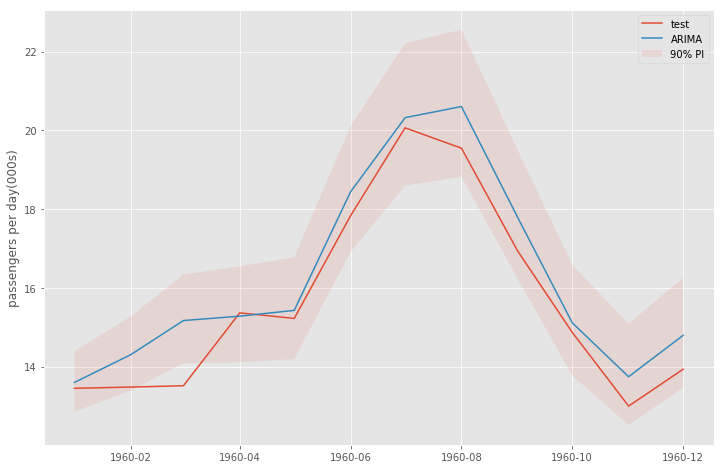

In [127]:
#plot the model with 90% predictions intervals
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(12, 8))

axes.figsize = (12, 10)

axes.plot(test_adj)
axes.plot(pd.Series(point_forecasts, index=test.index));
axes.set(ylabel='passengers per day(000s)');

limits = pd.DataFrame(intervals, index=test.index, columns=['lower', 'upper'])
axes.fill_between(test.index, limits['lower'], limits['upper'], 
                  alpha=.1, 
                  label='90% PI')

axes.legend(['test', 'ARIMA', '90% PI']);

In [128]:
#RMSE
rmse(x1=test_adj, x2=point_forecasts)

0.7703993075724109

In [129]:
#MAPE
mean_absolute_percentage_error(y_true=test_adj, y_pred=point_forecasts)

4.168018664108781

In [130]:
#simulated coverage of the forecast.
for h in range(2, HORIZON+1, 2):
    h_validation = test_adj.iloc[:h].to_numpy()
    h_upper = limits['upper'][:h]
    h_lower = limits['lower'][:h]
    covered = ((h_validation > h_lower) & (h_validation < h_upper)).sum()
    coverage = covered / h
    print(f'h_{h}: {coverage}')

h_2: 1.0
h_4: 0.75
h_6: 0.8333333333333334
h_8: 0.875
h_10: 0.9
h_12: 0.9166666666666666


# Produce the final forecast!

In [131]:
HORIZON=12
airline_adj = np.log(airline / airline.index.days_in_month)

model.fit(airline_adj)
final_forecast = model.predict(n_periods=HORIZON, return_conf_int=True, alpha=0.1)

/home/tom/anaconda3/envs/cc_forecast/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [132]:
#back transform
point_forecasts = np.exp(final_forecast[0])
intervals = np.exp(final_forecast[1])

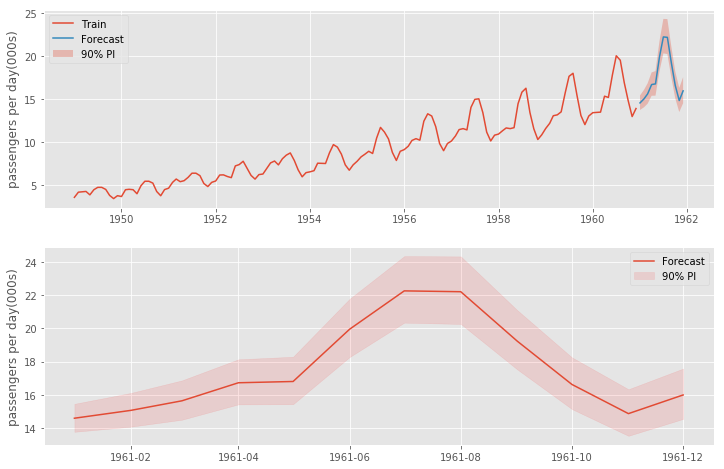

In [133]:
#create an datetime index for the forecast horizon
forecast_index = pd.date_range(start='1961-01-01', periods=HORIZON, freq='MS')

#plot the model with 90% predictions intervals
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

axes[0].plot(np.exp(airline_adj))
axes[0].plot(pd.Series(point_forecasts, index=forecast_index));

axes[0].set(ylabel='passengers per day(000s)');

limits = pd.DataFrame(intervals, index=forecast_index, columns=['lower', 'upper'])
axes[0].fill_between(forecast_index, limits['lower'], limits['upper'], 
                  alpha=.3, 
                  label='90% PI')

axes[0].legend(['Train', 'Forecast', '90% PI']);



axes[1].plot(pd.Series(point_forecasts, index=forecast_index));
axes[1].set(ylabel='passengers per day(000s)');

limits = pd.DataFrame(intervals, index=forecast_index, columns=['lower', 'upper'])
axes[1].fill_between(forecast_index, limits['lower'], limits['upper'], 
                  alpha=.1, 
                  label='90% PI', color='red')

axes[1].legend(['Forecast', '90% PI']);

In [134]:
limits['y_hat'] = point_forecasts

In [135]:
limits.to_csv('forecast.csv')

# Thanks!  Hope you enjoyed this introduction.

In your own time have a go **yourself** with the Lynx dataset. The Lynx dataset records the number of skins of predators (lynx) that were collected over many years by the Hudson’s Bay Company (1821 - 1934). It’s commonly used for time-series benchmarking (Brockwell and Davis - 1991)

In [136]:
lynx = load_lynx(as_series=True)

In [137]:
HOLDOUT = 10
train, test = lynx[:-HOLDOUT], lynx[-HOLDOUT:]

In [138]:
len(train)

104

In [139]:
len(test)

10

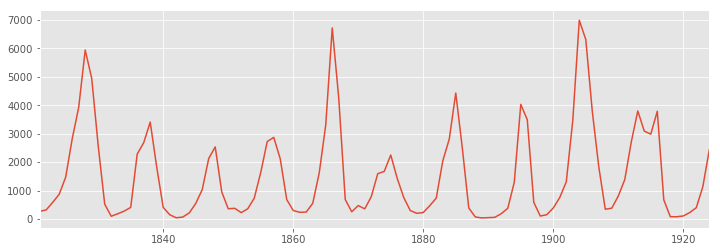

In [140]:
train.plot(figsize=(12,4));